<a href="https://colab.research.google.com/github/jear2412/MCMC/blob/master/HMC-TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from mpl_toolkits import mplot3d
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

Found GPU at: /device:GPU:0


In [0]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
tfd = tfp.distributions

dtype = tf.float32

target = tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(probs=[0.25, 0.25, 0.25, 0.25]),
    components_distribution=tfd.MultivariateNormalDiag(
        loc=[[-1., -1], [1., 1.],  [1., -1.] , [-1., 1.] ],
        scale_identity_multiplier=[0.25, 0.25, 0.25, 0.25]))


In [0]:

inverse_temperatures = 0.5**tf.range(4, dtype=dtype)

# step_size must broadcast with all batch and event dimensions of target.
# Here, this means it must broadcast with:
 #[len(inverse_temperatures)] + target.event_shape


step_size = 0.5 #/ tf.reshape(tf.sqrt(inverse_temperatures), shape=(4, 1))

def make_kernel_fn(target_log_prob_fn, seed):
  return tfp.mcmc.HamiltonianMonteCarlo(
      target_log_prob_fn=target_log_prob_fn,
      seed=seed, step_size=step_size, num_leapfrog_steps=5)

remc = tfp.mcmc.ReplicaExchangeMC(
    target_log_prob_fn=target.log_prob,
    inverse_temperatures=inverse_temperatures,
    make_kernel_fn=make_kernel_fn)


def trace_swaps(unused_state, results):
  return (results.is_swap_proposed_adjacent,
          results.is_swap_accepted_adjacent)



In [0]:

samples = tfp.mcmc.sample_chain(
    num_results=10000,
    current_state=tf.ones(2, dtype=dtype)-0.5,
    kernel=remc,
    trace_fn=None,
    num_burnin_steps=0)


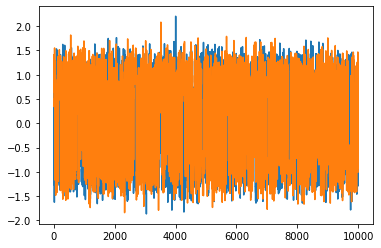

In [8]:
plt.plot(samples[:,0])
plt.plot(samples[:,1])



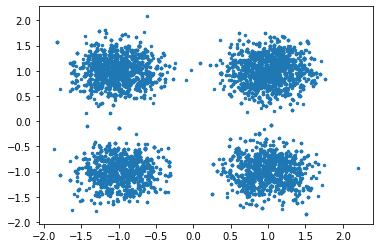

In [9]:

plt.plot(samples[:, 0], samples[:, 1], '.', markersize=5)
plt.show()